In [10]:
import pandas as pd
import numpy as np
import cv2
import glob
from PIL import Image

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
# image size: 1080*1920
INPUT_HEIGHT = 216
INPUT_WIDTH = 384
INPUT_CHANNEL = 3
INPUT_SHAPE = (INPUT_HEIGHT,INPUT_WIDTH,INPUT_CHANNEL)

In [6]:
x_paths = glob.glob('data/stimuli.out/*.jpg', recursive=False)

In [7]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

In [37]:
for i, path in enumerate(x_paths):
    img = cv2.imread(path)
    (is_success, pred) = saliency.computeSaliency(img)
    pred = (pred * 255).astype("uint8")
    cv2.imwrite('data/base/' + str(i) + '.png', pred)

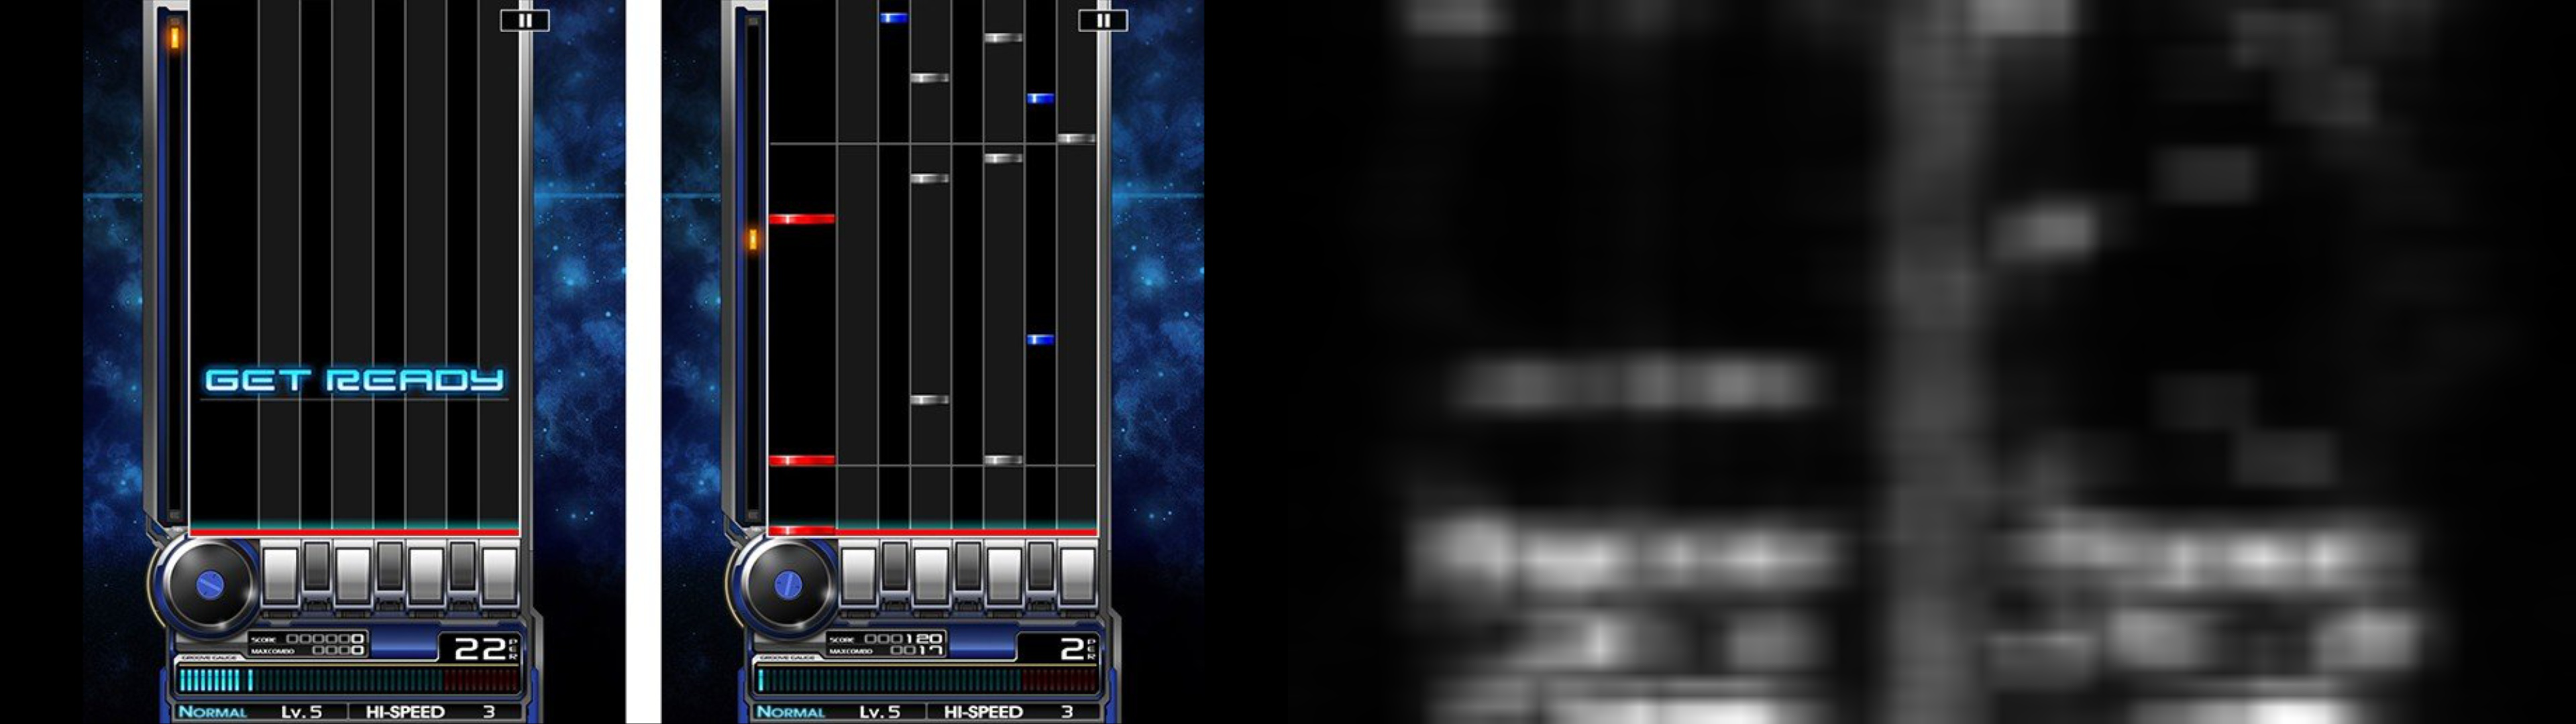

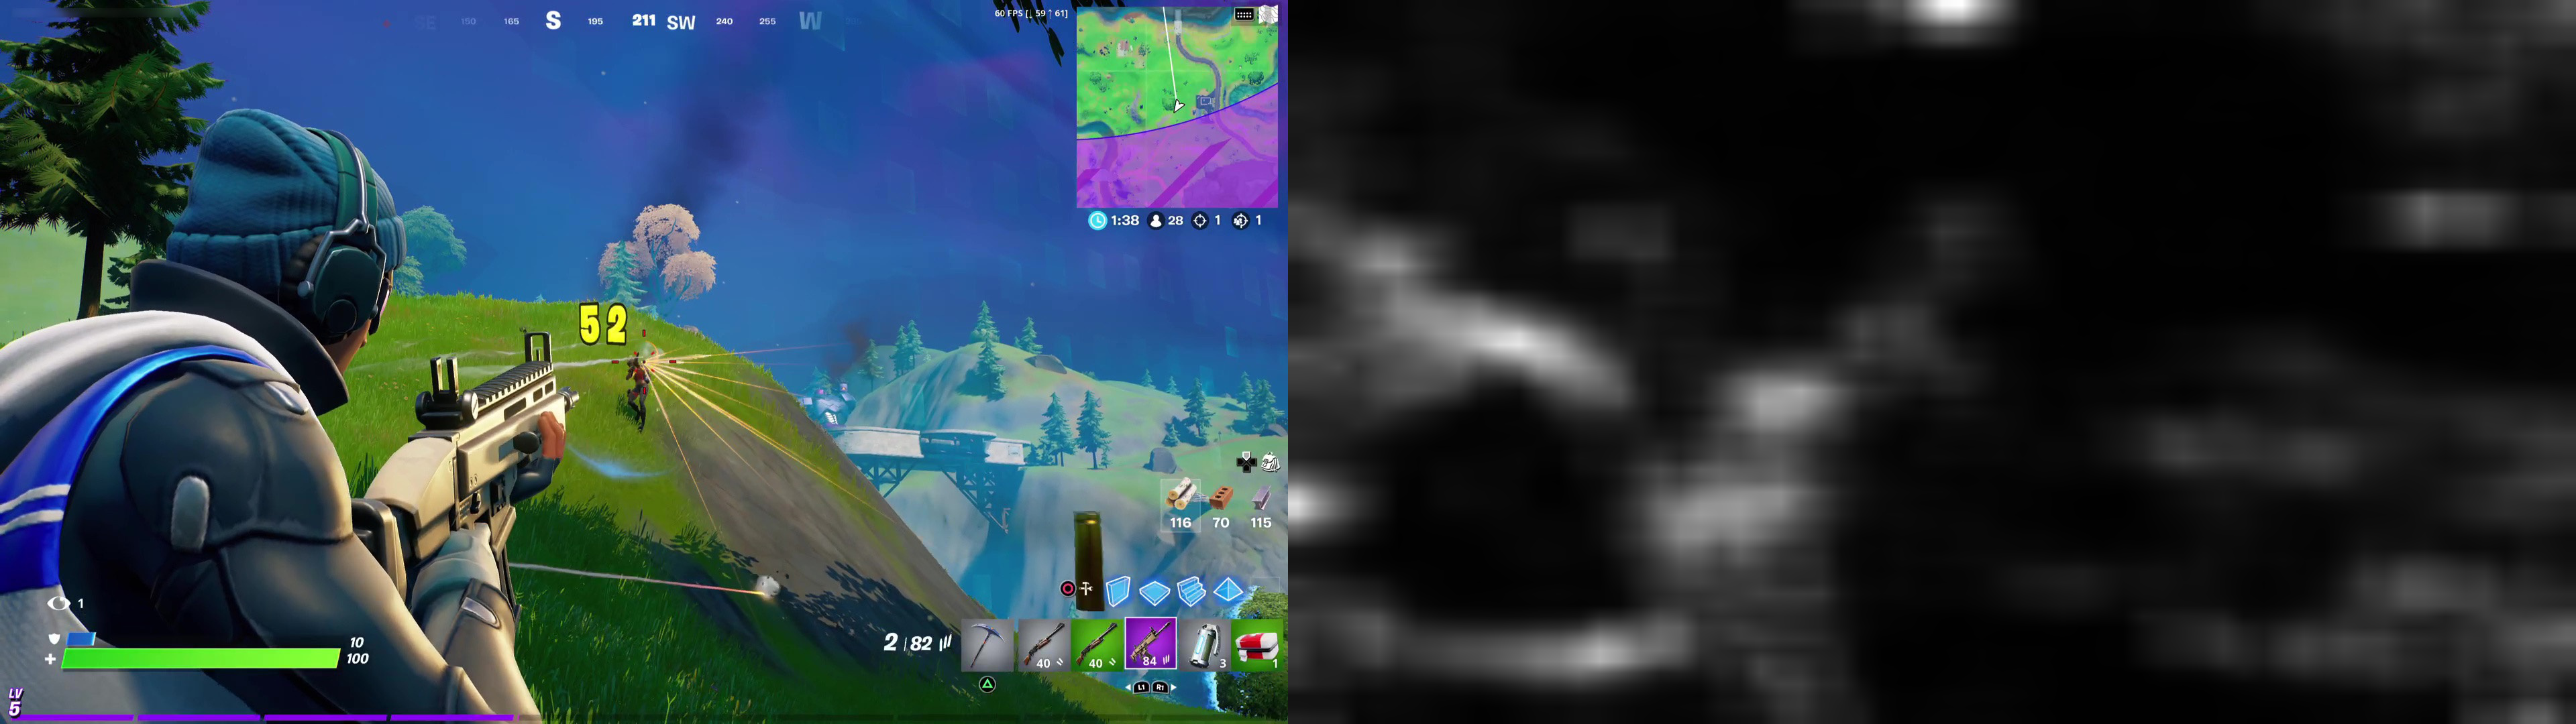

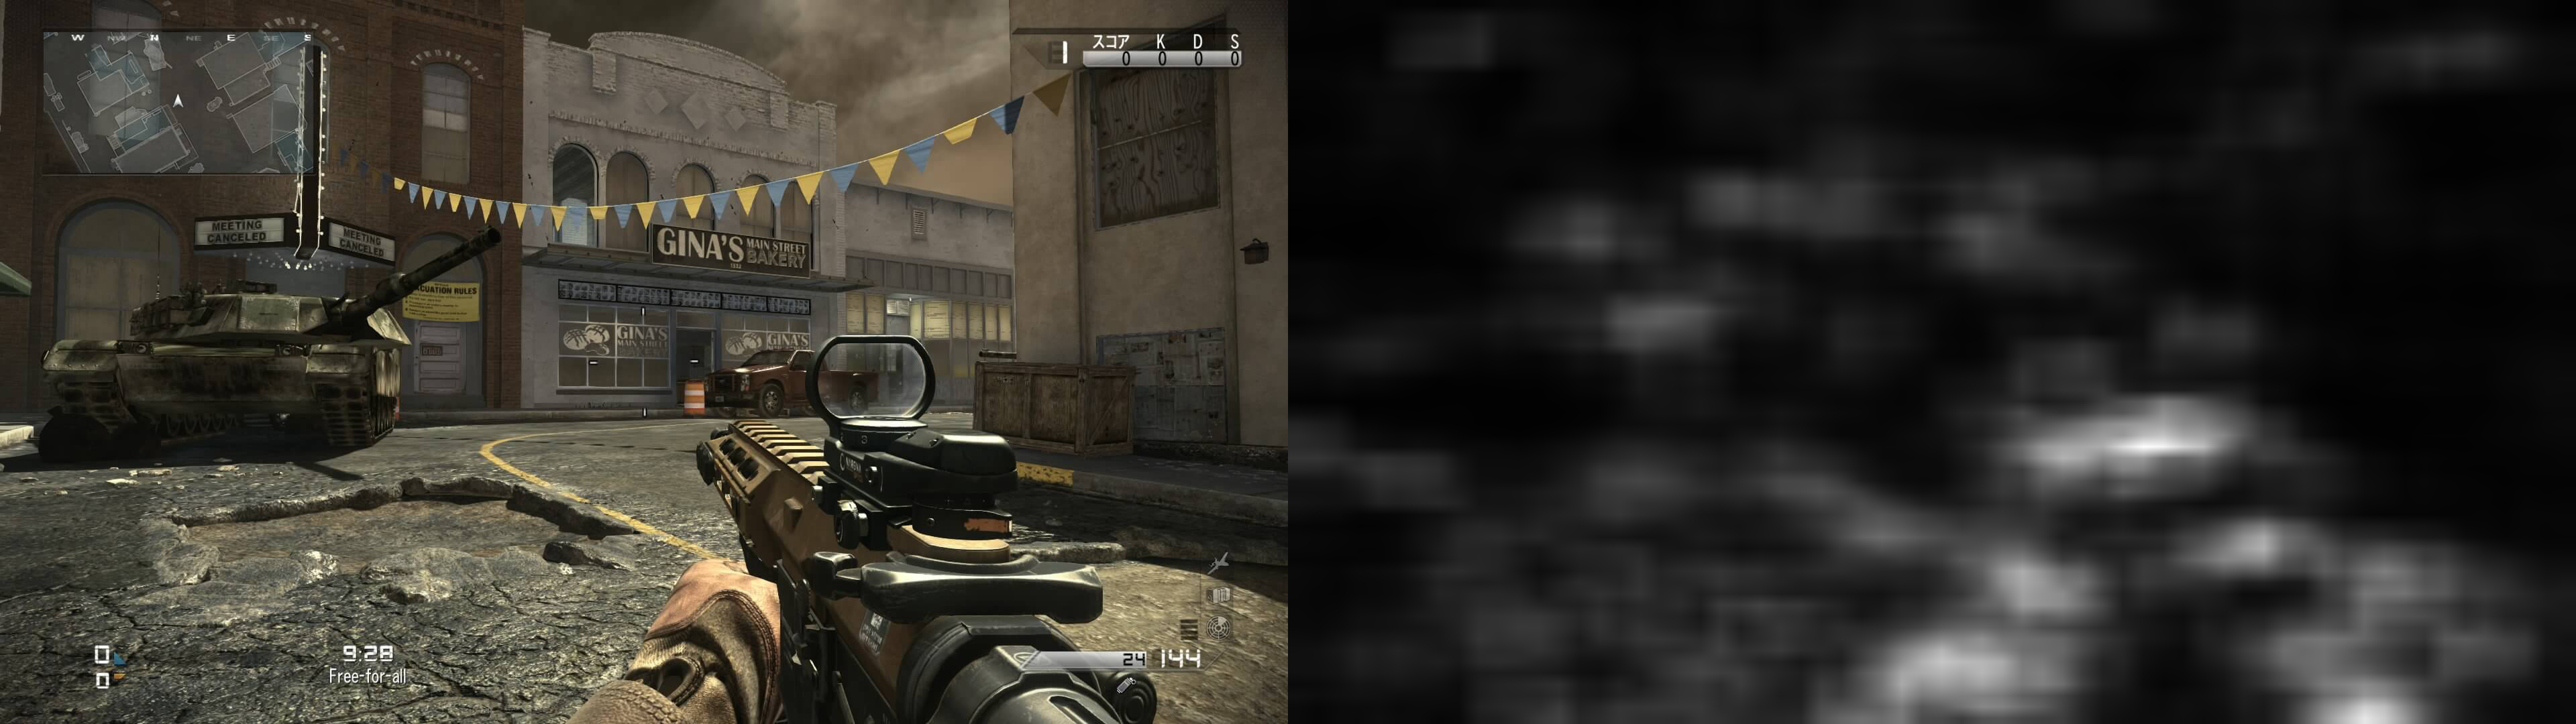

In [41]:
# sample
for i in range(0,3):
    src = Image.open(x_paths[i])
    sal = Image.open('data/base/' + str(i) + '.png')
    dst = Image.new('RGB', (src.width + sal.width, src.height))
    dst.paste(src, (0, 0))
    dst.paste(sal, (src.width, 0))
    display(dst)